<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>



# **Final Project: Boston Housing**


##### Estimated time needed: **60** minutes


#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-4df13306bf58>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


==== 1st 5 rows ====


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


==== Info ====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


None

==== Descriptive statistics ====


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


==== 1. Boxplot for MEDV (Median value of owner-occupied homes) ====


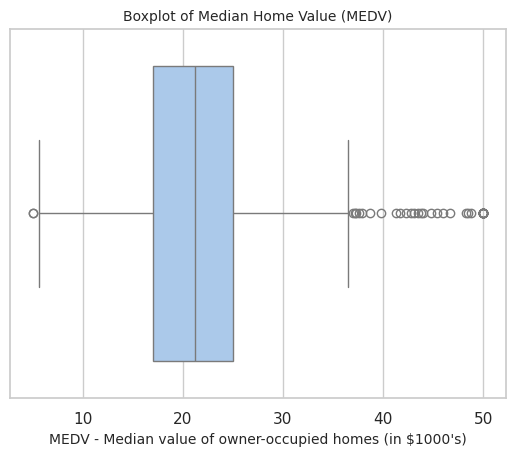

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

==== 2. Bar plot for CHAS (Charles River dummy variable) ====


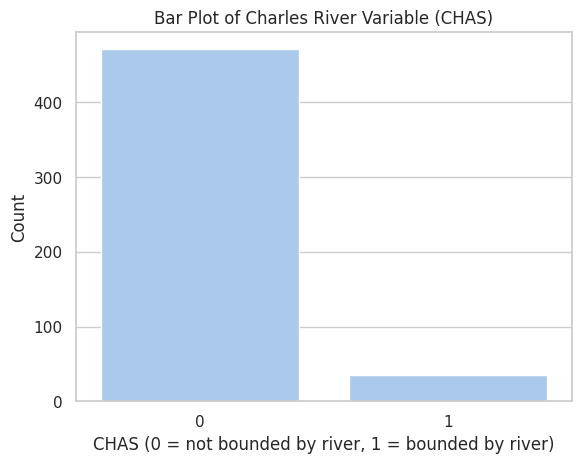

count    506.000000
mean       0.069170
std        0.253994
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: CHAS, dtype: float64

==== 3. Boxplot of MEDV vs AGE_group ====


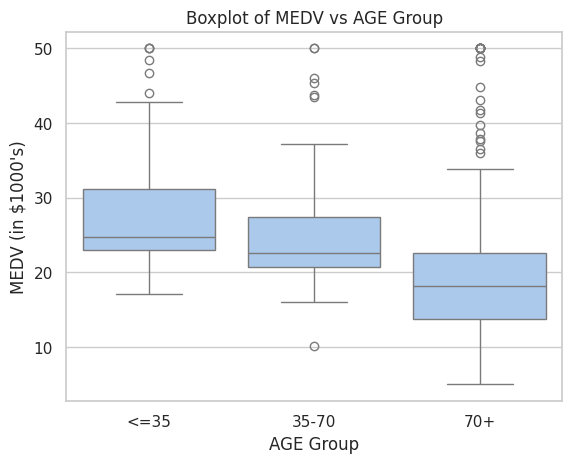

count     506
unique      3
top       70+
freq      287
Name: AGE_group, dtype: object

==== 4. Scatter plot: NOX vs INDUS ====


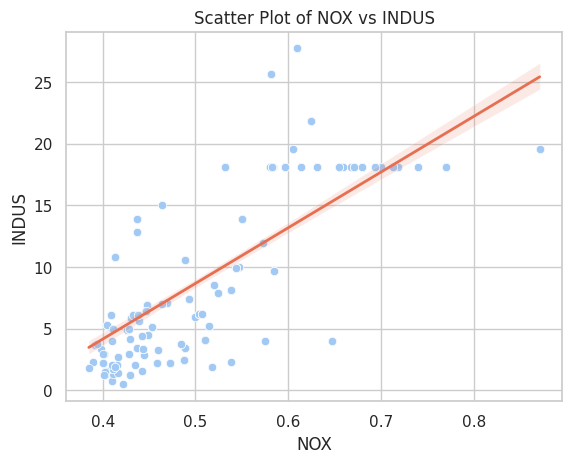

count    506.000000
mean       0.554695
std        0.115878
min        0.385000
25%        0.449000
50%        0.538000
75%        0.624000
max        0.871000
Name: NOX, dtype: float64

count    506.000000
mean      11.136779
std        6.860353
min        0.460000
25%        5.190000
50%        9.690000
75%       18.100000
max       27.740000
Name: INDUS, dtype: float64

==== 5. Histogram of PTRATIO (pupil-teacher ratio) ====


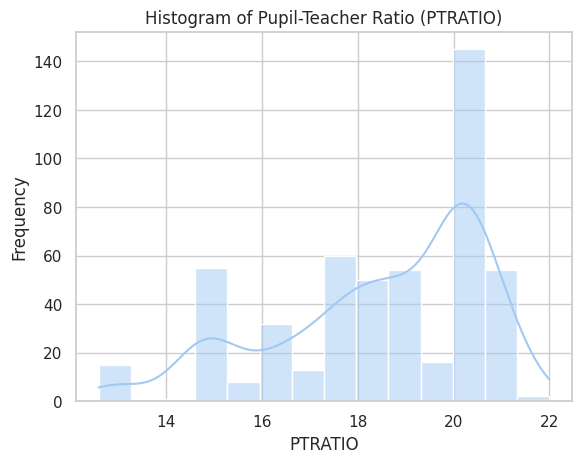

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: PTRATIO, dtype: float64

==== Q1: T-test for MEDV by CHAS (river vs not by river) ====
T-statistic: 3.1133, p-value: 0.0036
Conclusion: Reject H0 – there IS a significant difference in MEDV between houses bounded by the river and those that are not.
==== Q2: ANOVA – MEDV across AGE groups (<=35, 35–70, 70+) ====
F-statistic: 36.4076, p-value: 0.0000
Conclusion: Reject H0 – at least one AGE group has a different MEDV.
==== Q3: Pearson Correlation between NOX and INDUS ====
Correlation coefficient r: 0.7637, p-value: 0.0000
Interpretation: There is a significant linear relationship between NOX and INDUS.
r = 0.7637 (values closer to -1 or 1 indicate stronger relationships).
==== Q4: Regression – Effect of DIS on MEDV ====
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:      

In [5]:
# ---- TASK 1: Become familiar with the dataset ----
print("==== 1st 5 rows ====")
display(boston_df.head())

print("==== Info ====")
display(boston_df.info())

print("==== Descriptive statistics ====")
display(boston_df.describe())

# ---- TASK 2: Descriptive Statistics and Visualizations ----
sns.set_theme(style="whitegrid", palette="pastel")

print("==== 1. Boxplot for MEDV (Median value of owner-occupied homes) ====")
medv = boston_df["MEDV"].dropna().astype(float)
ax = sns.boxplot(x=medv)
ax.set_title("Boxplot of Median Home Value (MEDV)", fontsize=10)
ax.set_xlabel("MEDV - Median value of owner-occupied homes (in $1000's)", fontsize=10)
pyplot.show()
display(medv.describe())

print("==== 2. Bar plot for CHAS (Charles River dummy variable) ====")
chas = boston_df["CHAS"].dropna().astype(int)
ax = sns.countplot(x=chas)
ax.set_title("Bar Plot of Charles River Variable (CHAS)")
ax.set_xlabel("CHAS (0 = not bounded by river, 1 = bounded by river)")
ax.set_ylabel("Count")
pyplot.show()
display(chas.describe())

print("==== 3. Boxplot of MEDV vs AGE_group ====")
# 3 groups: <=35, 35–70, 70+
medv = boston_df["MEDV"].dropna().astype(float)
boston_df['AGE_group'] = pd.cut( boston_df['AGE'], bins=[0, 35, 70, 200],
                                labels=["<=35", "35-70", "70+"])
ax = sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)
ax.set_title("Boxplot of MEDV vs AGE Group")
ax.set_xlabel("AGE Group")
ax.set_ylabel("MEDV (in $1000's)")
pyplot.show()
display(boston_df['AGE_group'].describe())

print("==== 4. Scatter plot: NOX vs INDUS ====")
ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)
ax.set_title("Scatter Plot of NOX vs INDUS")
ax.set_xlabel("NOX (nitric oxides concentration)")
ax.set_ylabel("INDUS (non-retail business acres per town)")
# Add regression line
sns.regplot(x=boston_df['NOX'], y=boston_df['INDUS'], data=boston_df, scatter=False, 
           ax=ax, color="#E76F51", line_kws={"linewidth":2})
pyplot.show()
display(boston_df['NOX'].describe())
display(boston_df['INDUS'].describe())

print("==== 5. Histogram of PTRATIO (pupil-teacher ratio) ====")
ax = sns.histplot(boston_df["PTRATIO"], kde=True)
ax.set_title("Histogram of Pupil-Teacher Ratio (PTRATIO)")
ax.set_xlabel("PTRATIO")
ax.set_ylabel("Frequency")
pyplot.show()
display(boston_df["PTRATIO"].describe())

# ---------- TASK 3: Statistical Tests ----------
alpha = 0.05  # significance level

print("==== Q1: T-test for MEDV by CHAS (river vs not by river) ====")
medv_river    = boston_df[boston_df["CHAS"] == 1]["MEDV"]
medv_no_river = boston_df[boston_df["CHAS"] == 0]["MEDV"]
t_stat, p_val = scipy.stats.ttest_ind(medv_river, medv_no_river, equal_var=False)
print(f"T-statistic: {t_stat:.4f}, p-value: {p_val:.4f}")

if p_val < alpha:
    print("Conclusion: Reject H0 – there IS a significant difference in MEDV between houses bounded by the river and those that are not.")
else:
    print("Conclusion: Fail to reject H0 – there is NO significant difference in MEDV between houses bounded by the river and those that are not.")

print("==== Q2: ANOVA – MEDV across AGE groups (<=35, 35–70, 70+) ====")
g1 = boston_df[boston_df["AGE_group"] == "<=35"]["MEDV"]
g2 = boston_df[boston_df["AGE_group"] == "35-70"]["MEDV"]
g3 = boston_df[boston_df["AGE_group"] == "70+"]["MEDV"]
f_stat, p_val = scipy.stats.f_oneway(g1, g2, g3)
print(f"F-statistic: {f_stat:.4f}, p-value: {p_val:.4f}")

if p_val < alpha:
    print("Conclusion: Reject H0 – at least one AGE group has a different MEDV.")
else:
    print("Conclusion: Fail to reject H0 – MEDV does not differ significantly among AGE groups.")

print("==== Q3: Pearson Correlation between NOX and INDUS ====")
corr, p_val = scipy.stats.pearsonr(boston_df["NOX"], boston_df["INDUS"])
print(f"Correlation coefficient r: {corr:.4f}, p-value: {p_val:.4f}")

if p_val < alpha:
    sig_text = "significant"
else:
    sig_text = "not significant"

print(f"Interpretation: There is a {sig_text} linear relationship between NOX and INDUS.\n"
      f"r = {corr:.4f} (values closer to -1 or 1 indicate stronger relationships).")

print("==== Q4: Regression – Effect of DIS on MEDV ====")
# Using formula interface already imported as 'ols'
reg_model = ols("MEDV ~ DIS", data=boston_df).fit()
print(reg_model.summary())

coef_dis = reg_model.params["DIS"]
p_val_dis = reg_model.pvalues["DIS"]

print(f"\nCoefficient for DIS: {coef_dis:.4f}, p-value: {p_val_dis:.4f}")

if p_val_dis < alpha:
    relation = "significant"
else:
    relation = "not significant"

direction = "decrease" if coef_dis < 0 else "increase"

print(f"Interpretation: DIS has a {relation} effect on MEDV.\n"
      f"For each additional unit of DIS, the predicted MEDV tends to {direction} by {abs(coef_dis):.2f} (in $1000's), with other factors being constant.")